In [154]:
import os
print(os.getcwd())
import pandas as pd
import numpy as np
import json as json
import seaborn as sns

import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

from helper_functions import strategy_to_label
from helper_functions import all_information_modes

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


d:\Personal Projects\Social_Ecological_Info_Cooperation\Code\My_Simulations


In [155]:
def strategy_to_label_with_mixed(strategy, mode, include_mixed_strategies = True):

    # print(strategy)

    strategy = np.array(strategy)
    if mode == 'social' or mode == 'complete':
   

        Oset = np.array(['c,c', 'c,d', 'd,c', 'd,d'])
        if np.all(strategy >= 0.9):
            classification = 'ALL C'

        elif np.all((strategy[np.isin(Oset, ['c,c', 'd,d'])]) >= 0.9) and np.all((strategy[np.isin(Oset, ['c,d', 'd,c'])]) <= 0.1):
            classification = 'WSLS'

        elif np.all((strategy[np.isin(Oset, ['c,c'])]) >= 0.9) and np.all((strategy[np.isin(Oset, ['c,d', 'd,c', 'd,d'])]) <= 0.1):
            classification = 'GT'
        
        elif np.all(strategy <= 0.1):
            classification = 'ALL D'

        elif np.all((strategy[np.isin(Oset, ['d,d'])]) >= 0.9) and np.all((strategy[np.isin(Oset, ['c,d', 'd,c', 'c,c'])]) <= 0.1):
            classification = 'Inv. GT'


        elif include_mixed_strategies:
            strategy_rounded = np.round(strategy)
            #change everything to equal to 1 or 0
           

            if np.all(strategy_rounded == 1):
                classification = 'Almost ALL C'
            elif np.all(strategy_rounded == 0):
                classification = 'Almost ALL D'
            elif np.all((strategy_rounded[np.isin(Oset, ['c,c', 'd,d'])]) == 1) and np.all((strategy_rounded[np.isin(Oset, ['c,d', 'd,c'])]) == 0):
                classification = 'Almost WSLS'
            elif np.all((strategy_rounded[np.isin(Oset, ['c,c'])]) == 1) and np.all((strategy_rounded[np.isin(Oset, ['c,d', 'd,c', 'd,d'])]) == 0):
                    classification = 'Almost GT'
            elif np.all((strategy_rounded[np.isin(Oset, ['d,d'])]) == 1) and np.all((strategy_rounded[np.isin(Oset, ['c,d', 'd,c', 'c,c'])]) == 0):
                    classification = 'Almost Inv. GT'
        
            else:
                classification = 'other'

        else:
            classification = "other"

    if mode == 'ecological' or mode == 'none':

        if np.all(strategy >= 0.9):
            classification = 'ALL C'
        elif np.all(strategy <= 0.1):
            classification = 'ALL D'

        elif include_mixed_strategies:
            strategy_rounded = np.round(strategy)
            #change everything to equal to 1 or 0
            if np.all(strategy_rounded == 1):
                classification = 'ALL C'
            elif np.all(strategy_rounded == 0):
                classification = 'ALL D'
            else:
                classification = 'other'
        else:
            classification = "other"

    return classification


In [156]:
# df = pd.read_excel("../Data/Basin_of_Attraction/complete/complete_dis__0.995_m_6.5_unique_strategies_and_frequency.xlsx")


def convert_final_point_to_numpy_array(final_point, mode):
    if mode == 'complete' or mode == 'social': number_of_prosperous_states = 4
    elif mode == 'ecological' or mode == 'none': number_of_prosperous_states = 1
    flat = np.fromstring(final_point.replace('[', ' ').replace(']', ' '), sep=' ', dtype=float)
    array = flat.reshape(2, number_of_prosperous_states)
    return array



def process_and_parase_basin_of_attraction_data(df, mode):
    #first, we need to convert the final point from string to numpy array
    df["final_point"] = df["final_point"].apply(lambda x: convert_final_point_to_numpy_array(x, mode))
    
    df["final_point_label_agent_1"] = df["final_point"].apply(lambda x: strategy_to_label(x[0,:], mode, include_mixed_strategies = True))

    df = df.groupby("final_point_label_agent_1")["frequency"].sum()

    return df

In [157]:
def get_processed_basin_of_attraction_data(mode, discount_factors, m_values, strategies=['ALL C', 'WSLS', 'Inv. GT', 'ALL D']):
    list_for_dicts = [] 
    
    for m in m_values:

        for d in discount_factors:
            try:
                df = pd.read_excel(f"../Data/Basin_of_Attraction/{mode}/{mode}_dis__{d}_m_{m}_unique_strategies_and_frequency.xlsx")
                df = process_and_parase_basin_of_attraction_data(df, mode)                 #Here we process eacdh individual file and get array of strategies and their frequencies

        

                for s in strategies:
                    if s in df.index:
                        freq = df[s]
                    else:
                        freq = 0

                    list_for_dicts.append({"m_value": m, "discount_factor": d, "strategy": s, "frequency": freq})  #Here we create a list of dictionaries across all files. Now what I want is, 
            except FileNotFoundError:
                print(f"File not found for mode: {mode}, discount factor: {d}, m: {m}")
            continue

    df_for_ploting = pd.DataFrame(list_for_dicts)
    return df_for_ploting



In [158]:
def generate_basin_of_attraction_figure_from_data(df, mode, strategies_to_plot=['ALL C', 'WSLS', 'Inv. GT', 'ALL D']):

    strategy_colors_barplot = {
    'ALL C':   '#6ad46d',   # bright green
    'WSLS':   '#38c172',   # medium green
    'Inv. GT':'#e66d6d',   # warm red
    'ALL D':   '#ff4d4d',   # strong red
    'GT':      '#38c172',   # medium green
    'Almost ALL C': '#a1e6a1', # light green
    'Almost WSLS': '#a1e6a1', # light green
    'Almost Inv. GT': '#f4a1a1', # light red
    'Almost ALL D': '#f4a1a1', # light red
}

    sns.set_theme(context="talk", style="whitegrid")
    plt.rcParams.update({
        "axes.facecolor": "white",
        "figure.facecolor": "white",
        "axes.edgecolor":  "black",
        "grid.color":      "#d0d0d0",
        "grid.linestyle":  "--",
        "grid.linewidth":  0.6,
        "xtick.color":     "black",
        "ytick.color":     "black",
        "text.color":      "black",
        "axes.labelcolor": "black",
    })

    fig, ax = plt.subplots(figsize=(10, 4.5))
    x = np.arange(len(df.index))
    bottom = np.zeros(len(df))
    bar_width = 0.7

    for s in strategies_to_plot:
        ax.bar(
            x, df[s].values, bottom=bottom,
            label=s, 
            color=strategy_colors_barplot[s],
            edgecolor="black", linewidth=0.5,
            width=bar_width
        )
        bottom += df[s].values

    # X axis
    ax.set_xticks(x)
    ax.set_xticklabels([f"{d:.3f}" for d in df.index], rotation=0)
    ax.set_xlabel("Discount factor")
    ax.set_ylabel("Abundance (%)")

    # Fix Y axis 0–100
    ax.set_ylim(0, 100)
    ax.set_yticks(np.arange(0, 101, 20))

    # Legend outside (clean, white background)
    leg = ax.legend(
        title="Strategy", loc="center left", bbox_to_anchor=(1.02, 0.5),
        frameon=True, facecolor="white", edgecolor="black"
    )
    leg.get_title().set_color("black")

    sns.despine()   # remove top/right spines
    plt.tight_layout()
    plt.title("Basin of Attraction: " + str(mode))
    plt.show()



In [159]:
def plot_basin_of_attraction(discount_factors, m_values, strategies):
    for mode in all_information_modes:
        data_for_plotting = get_processed_basin_of_attraction_data(mode, discount_factors, m_values, strategies)
        data_for_plotting = data_for_plotting.pivot_table(index="discount_factor",
                                                          columns="strategy",
                                                          values="frequency",
                                                          aggfunc="sum").fillna(0)
        generate_basin_of_attraction_figure_from_data(data_for_plotting, mode, strategies)

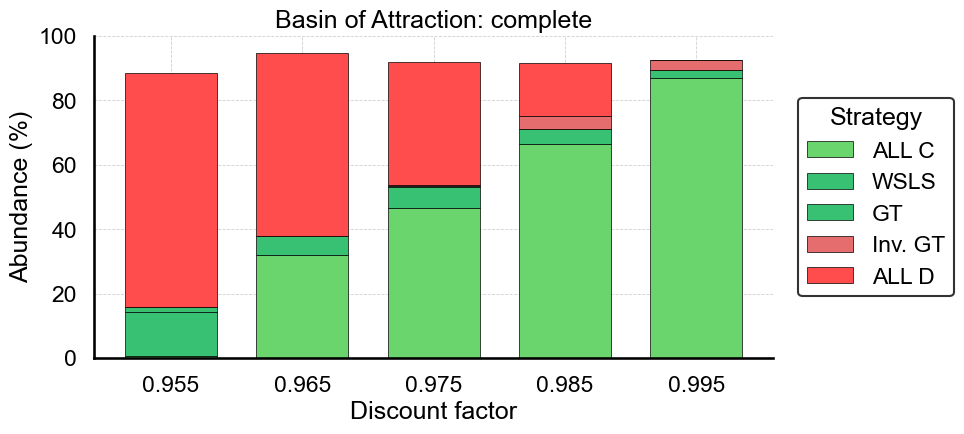

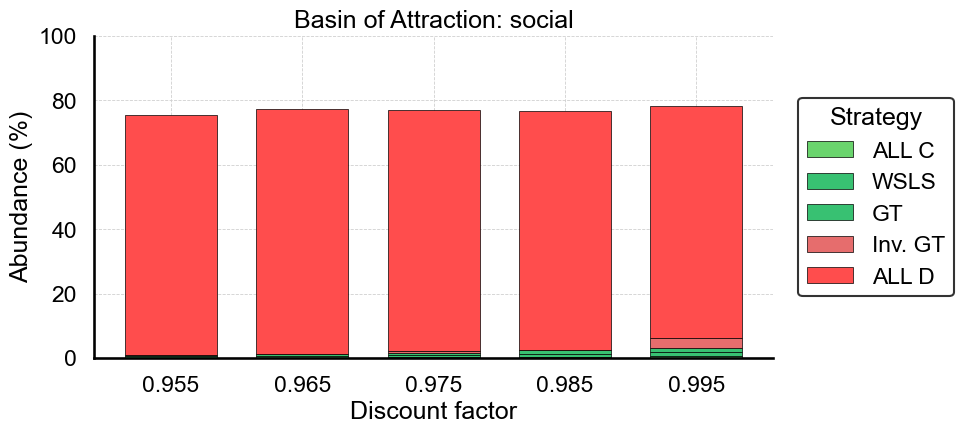

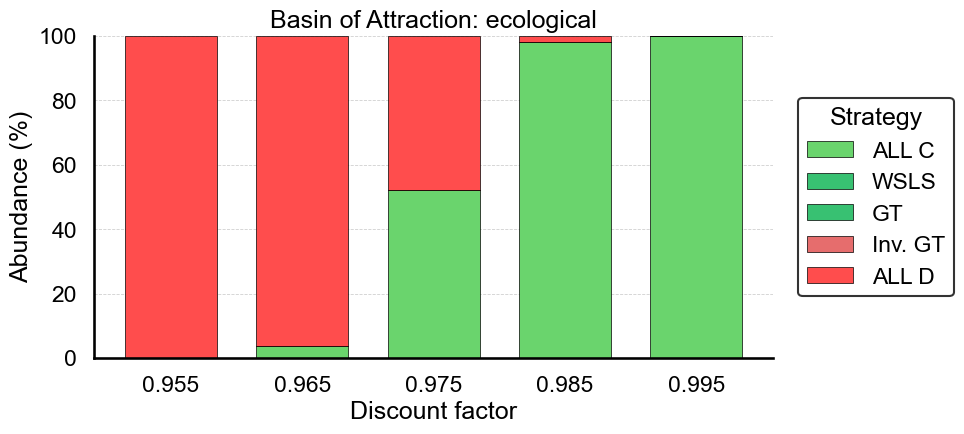

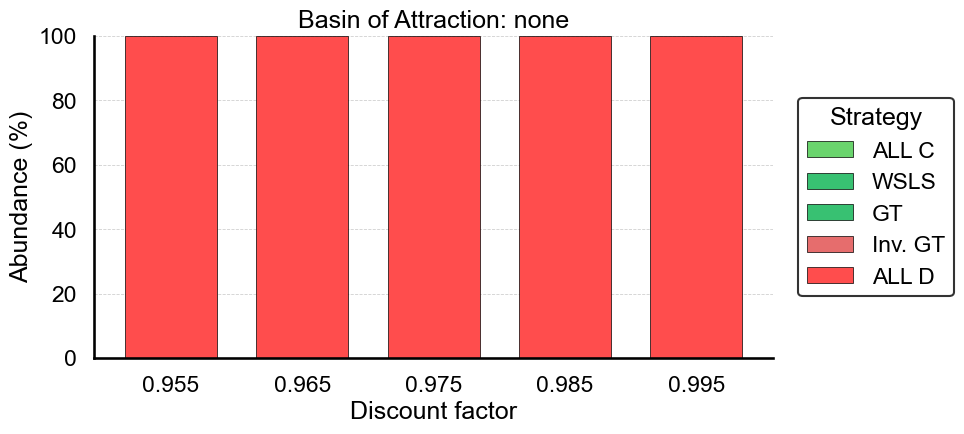

In [161]:
pure_and_mixed_strategies = ['ALL C', 'WSLS', 'GT', 'Inv. GT', 'ALL D', 'Almost ALL C', 'Almost WSLS', 'Almost Inv. GT', 'Almost ALL D']
pure_strategies = ['ALL C', 'WSLS', 'GT', 'Inv. GT', 'ALL D']

plot_basin_of_attraction([0.955, 0.965, 0.975, 0.985, 0.995], [6.5], pure_strategies)